# Notas de Clase sobre Aprendizaje Supervisado, División de Datos, Validación Cruzada y Selección de Modelos
Este cuaderno ofrece una introducción completa al aprendizaje supervisado, la división de datos, la validación cruzada y la selección de modelos. Incluye explicaciones detalladas, fórmulas matemáticas, ejemplos prácticos con visualizaciones y código en Python usando scikit-learn. El objetivo es aclarar conceptos clave y proporcionar conocimientos prácticos para principiantes.

## 1. ¿Qué es el Aprendizaje Supervisado?
El aprendizaje supervisado es un tipo de aprendizaje automático donde un modelo se entrena con un conjunto de datos etiquetado, es decir, cada entrada (características, $X$) está asociada con una salida conocida (etiqueta, $y$). El modelo aprende a predecir $y$ para nuevas entradas no vistas.
- **Componentes clave**:  
    - **Características ($X$)**: Variables que describen la entrada (por ejemplo, tamaño de una casa, número de habitaciones).  
    - **Etiquetas ($y$)**: La variable objetivo (por ejemplo, precio de la casa, diagnóstico de enfermedad).
    - **Modelo**: Una función que mapea entradas a salidas (por ejemplo, regresión lineal, árboles de decisión).
- **Tipos**:
    - **Clasificación**: Predice categorías discretas (por ejemplo, correo spam o no spam).
    - **Regresión**: Predice valores continuos (por ejemplo, temperatura, precio de acciones).

**Observación**: La calidad de las características afecta el rendimiento. Características irrelevantes o redundantes pueden introducir ruido.

### 1.1. Marco Matemático del Aprendizaje Supervisado
El aprendizaje supervisado busca una función $f(X; \theta)$ que mapee entradas $X$ a salidas $y$, donde $\theta$ son los parámetros del modelo. Dado un conjunto de datos $\{(X_i, y_i)\}_{i=1}^N$, el objetivo es encontrar $\theta$ que minimice una función de pérdida $L(y, f(X; \theta))$, que mide el error entre las predicciones $f(X; \theta)$ y los valores reales $y$. Formalmente, resolvemos:$$\min_\theta \frac{1}{N} \sum_{i=1}^N L(y_i, f(X_i; \theta))$$

**Ejemplo**: En regresión lineal, $f(X; \theta) = X\theta$ (donde $\theta$ son los coeficientes) y la pérdida es el error cuadrático medio.

### 1.2. Funciones de Pérdida
La función de pérdida $L$ depende del tipo de problema:

**Regresión** (Mean Squared Error, MSE):$$L(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^N (y_i - f(X_i; \theta))^2$$ 
Esto penaliza grandes diferencias entre el valor real $y_i$ y la predicción $f(X_i; \theta)$.

**Clasificación Binaria** (Cross-Entropy Loss):$$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(f(X_i; \theta)) + (1-y_i) \log(1-f(X_i; \theta)) \right]$$  Donde $f(X_i; \theta)$ es la probabilidad predicha de la clase positiva.

**Observación**: La elección de la pérdida afecta cómo el modelo prioriza los errores.

### 1.3. Optimización mediante Descenso de Gradiente
Para minimizar la pérdida, usamos **descenso de gradiente**, que actualiza los parámetros $\theta$ iterativamente:$$\theta \leftarrow \theta - \eta \nabla_\theta L(y, f(X; \theta))$$Donde:- $\eta$ es la tasa de aprendizaje (controla el tamaño de los pasos).- $\nabla_\theta L$ es el gradiente de la pérdida respecto a $\theta$.

**Ejemplo**: En regresión lineal, el gradiente es:$$\nabla_\theta L = \frac{2}{N} X^T (X\theta - y)$$

**Observación**: Una $\eta$ demasiado grande puede causar inestabilidad; una demasiado pequeña ralentiza el aprendizaje.

### 1.4. Regularización
Para evitar el sobreajuste, añadimos un término de regularización a la pérdida:$$L_{\text{reg}}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^N L(y_i, f(X_i; \theta)) + \lambda R(\theta)$$
Donde:
- $R(\theta)$: Término de penalización (e.g., L2: $R(\theta) = \|\theta\|_2^2 = \sum_j \theta_j^2$).
- $\lambda$: Controla la fuerza de la regularización.

**Ejemplo**: En regresión Ridge, la pérdida es:$$L_{\text{reg}} = \frac{1}{N} \sum_{i=1}^N (y_i - X_i\theta)^2 + \lambda \|\theta\|_2^2$$**Observación**: La regularización reduce la complejidad del modelo, mejorando la generalización.

### 1.5. Proceso de Entrenamiento Supervisado
El entrenamiento supervisado sigue estos pasos:
1. **Inicializar** $\theta$ (e.g., aleatoriamente con una distribución normal de media cero y varianza alta).
2. **Calcular** la pérdida $L$ en el conjunto de entrenamiento.
3. **Actualizar** $\theta$ usando descenso de gradiente.
4. **Repetir** hasta que la pérdida converja o se alcance un número máximo de iteraciones.

El objetivo final es:$$\min_\theta \left[ \frac{1}{N} \sum_{i=1}^N L(y_i, f(X_i; \theta)) + \lambda R(\theta) \right]$$
**Observación**: El equilibrio entre pérdida y regularización es clave para un modelo robusto.

### Ejemplo 1: Regresión Lineal Simple
Predecir el precio de una casa según su tamaño (en metros cuadrados). Usamos la pérdida MSE y optimizamos con descenso de gradiente.

Precio predicho para una casa de 185 m²: $406.57 mil


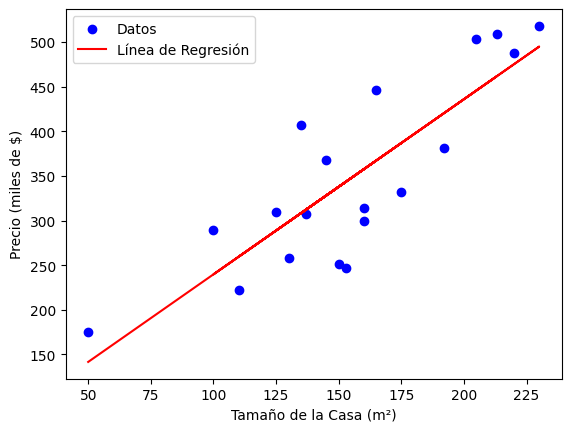

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Datos sintéticos: tamaño de la casa (m²) y precio (miles de $)
X = np.array([[130], [150], [160], [175], [100], [145], [220], [230], [135], [160], [110], [165], [125], [153], [137], [192], [205], [213], [50]])
# y = np.array([245, 312, 279, 308, 199, 219, 405, 324, 319, 255, 230, 270])
y = 2 * X[range(19),0] + 20 + np.random.normal(0, 40, 19)
# Ajustar modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)
# Predecir para una casa de 185 m²
nueva_casa = np.array([[185]])
precio_predicho = modelo.predict(nueva_casa)
print(f"Precio predicho para una casa de 185 m²: ${precio_predicho[0]:.2f} mil")
# Visualizar
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, modelo.predict(X), color='red', label='Línea de Regresión')
plt.xlabel('Tamaño de la Casa (m²)')
plt.ylabel('Precio (miles de $)')
plt.legend()
#plt.savefig('ejemplo_regresion_polinomica.png')
plt.show()
plt.close()

**Observación**: Aquí, $f(X; \theta) = \theta_0 + \theta_1 X$, y minimizamos $L = \frac{1}{N} \sum_{i=1}^N (y_i - (\theta_0 + \theta_1 X_i))^2$.

### Ejemplo 2: Regresión Polinómica
Exploremos un caso no lineal con regresión polinómica.

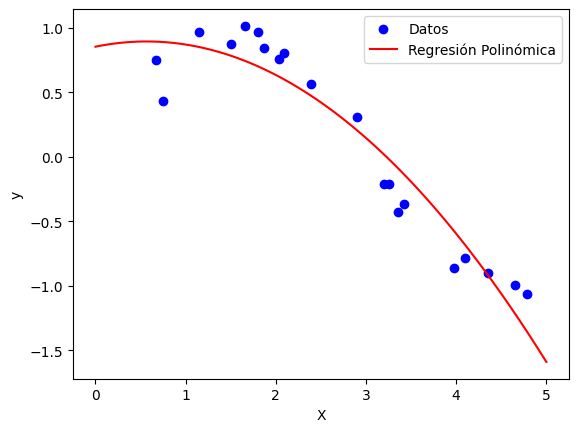

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Crear datos no lineales
np.random.seed(220)
X = np.sort(5 * np.random.rand(20, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])
# Ajustar regresión polinómica (grado 2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polyreg.fit(X, y)
# Visualizar
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = polyreg.predict(X_test)
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X_test, y_pred, color='red', label='Regresión Polinómica')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
#plt.savefig('ejemplo_regresion_polinomica.png')
plt.show()
plt.close()

**Observación**: Aquí, $f(X; \theta) = \theta_0 + \theta_1 X + \theta_2 X^2$, y el grado del polinomio afecta el riesgo de sobreajuste.

### Ejemplo 3: Clasificación Binaria
Clasificar correos electrónicos como spam o no spam usando regresión logística.

In [ ]:
from sklearn.linear_model import LogisticRegression
# Datos sintéticos: número de signos de exclamación y etiqueta (1=spam, 0=no spam)
X = np.array([[0], [1], [2], [3], [4], [0], [5], [2], [1], [6], [1], [5], [1]])
y = np.array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0])
# Ajustar modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X, y)
# Predecir para un correo con 3 signos de exclamación
nuevo_correo = np.array([[3]])
prediccion = modelo.predict(nuevo_correo)
print(f"Correo con 3 signos de exclamación es: {'Spam' if prediccion[0] == 1 else 'No Spam'}")

Correo con 3 signos de exclamación es: No Spam


**Observación**: La regresión logística usa $f(X; \theta) = \frac{1}{1 + e^{-X\theta}}$ y minimiza la pérdida de entropía cruzada.

### Ejemplo 4: Visualización de Clasificación Binaria
Visualicemos la frontera de decisión.

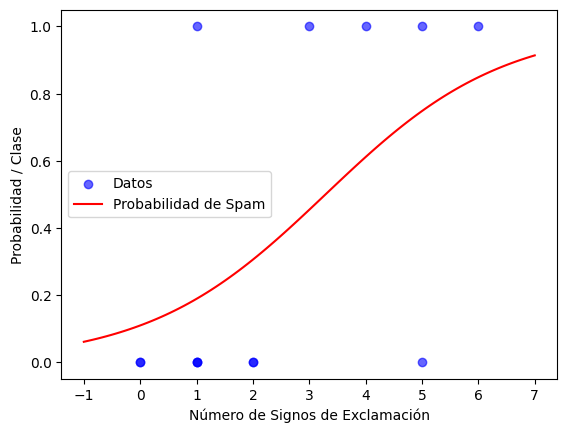

In [ ]:
# Visualizar frontera de decisión
X_range = np.linspace(-1, 7, 100).reshape(-1, 1)
y_prob = modelo.predict_proba(X_range)[:, 1]
plt.scatter(X, y, color='blue', label='Datos', alpha=0.6)
plt.plot(X_range, y_prob, color='red', label='Probabilidad de Spam')
plt.xlabel('Número de Signos de Exclamación')
plt.ylabel('Probabilidad / Clase')
plt.legend()
#plt.savefig('frontera_decision.png')
plt.show()
plt.close()

**Observación**: La curva sigmoide refleja la probabilidad predicha.

### Ejemplo 5: Clasificación Multi-Clase
Clasifiquemos flores Iris en tres especies.

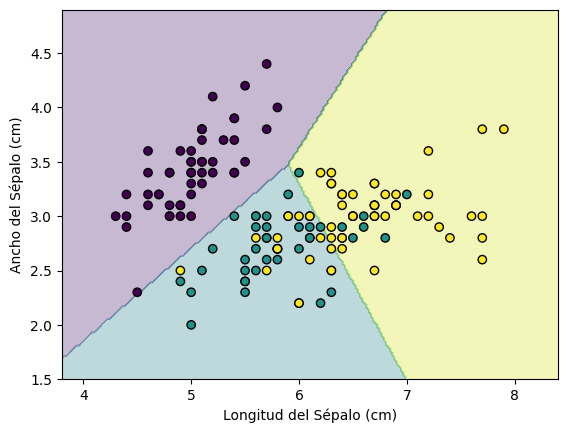

In [ ]:
from sklearn.datasets import load_iris
# Cargar datos Iris
iris = load_iris()
X = iris.data[:, :2]  
# Longitud y ancho del sépalo
y = iris.target
# Ajustar modelo
modelo_iris = LogisticRegression(max_iter=1000)
modelo_iris.fit(X, y)
# Visualizar fronteras de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = modelo_iris.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
#plt.savefig('iris_clasificacion.png')
plt.show()
plt.close()

**Observación**: La regresión logística multinomial extiende la entropía cruzada a múltiples clases.

### Ejemplo 6: Importancia de las Características
Agregar una característica irrelevante (ruido).

In [ ]:
# Datos con característica irrelevante
X_con_ruido = np.hstack([X, np.random.rand(X.shape[0], 1)])
# Ajustar modelo
modelo_con_ruido = LogisticRegression(max_iter=1000)
modelo_con_ruido.fit(X_con_ruido, y)
# Comparar precisión
from sklearn.metrics import accuracy_score
y_pred = modelo_iris.predict(X)
y_pred_ruido = modelo_con_ruido.predict(X_con_ruido)
print(f"Precisión sin ruido: {accuracy_score(y, y_pred):.3f}")
print(f"Precisión con ruido: {accuracy_score(y, y_pred_ruido):.3f}")

Precisión sin ruido: 0.820
Precisión con ruido: 0.813


**Observación**: El ruido puede degradar el rendimiento al distraer al modelo.

### Ejemplo 7: Ingeniería de Características
Crear una nueva característica (área aproximada).

In [ ]:
# Nueva característica: área aproximada (longitud * ancho)
X_nueva = np.c_[X, X[:, 0] * X[:, 1]]
# Ajustar modelo
modelo_nueva = LogisticRegression(max_iter=1000)
modelo_nueva.fit(X_nueva, y)
# Evaluar
y_pred_nueva = modelo_nueva.predict(X_nueva)
print(f"Precisión con nueva característica: {accuracy_score(y, y_pred_nueva):.3f}")

Precisión con nueva característica: 0.807


**Observación**: Las características derivadas pueden mejorar el modelo si son relevantes.

### Ejemplo 8: Visualización de Importancia de Características
Usar un Bosque Aleatorio para evaluar importancia.

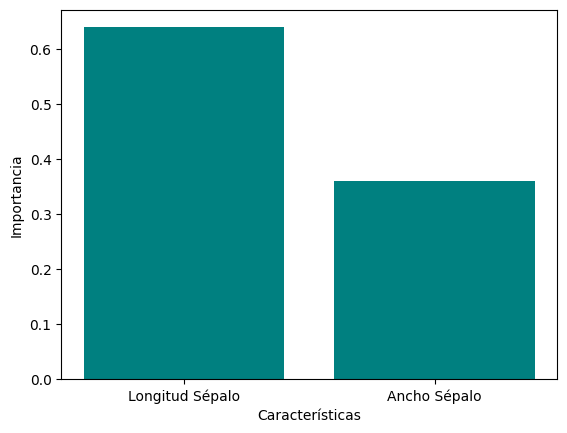

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Ajustar modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
# Visualizar importancia
importances = rf.feature_importances_
features = ['Longitud Sépalo', 'Ancho Sépalo']
plt.bar(features, importances, color='teal')
plt.xlabel('Características')
plt.ylabel('Importancia')
#plt.savefig('importancia_caracteristicas.png')
plt.show()
plt.close()

**Observación**: Las características importantes guían la selección de variables.

## 2. División de Datos en Conjuntos de Entrenamiento y Prueba
Dividimos los datos en:
- **Conjunto de entrenamiento**: Para ajustar el modelo (70-80%).
- **Conjunto de prueba**: Para evaluar el rendimiento (20-30%).

**¿Por qué dividir?** Evita el sobreajuste, asegurando que el modelo generalice.

### Ejemplo 9: División Básica de Datos
Dividir el conjunto de cáncer de mama.

In [120]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Cargar datos
datos = load_breast_cancer()
X, y = datos.data, datos.target
# Dividir datos: 80% entrenamiento, 20% prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=200)
# Entrenar modelo
modelo = LogisticRegression(max_iter=10000, random_state=42)
modelo.fit(X_entrenamiento, y_entrenamiento)
# Evaluar
y_pred = modelo.predict(X_prueba)
precision = accuracy_score(y_prueba, y_pred)
print(f"Precisión en el conjunto de prueba: {precision:.3f}")

Precisión en el conjunto de prueba: 0.886


**Observación**: El conjunto de prueba debe ser independiente.

### Ejemplo 10: Visualización de Distribución de Clases
Visualizar la distribución de clases.

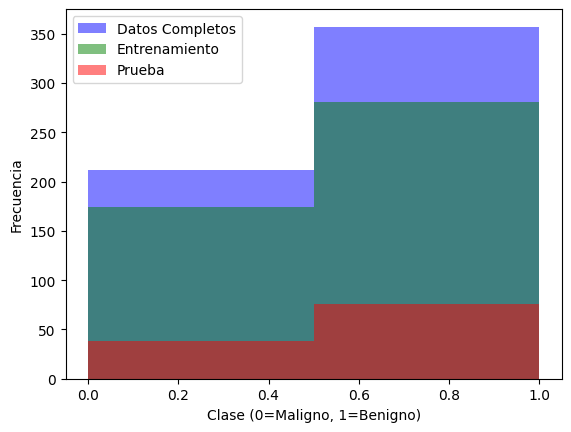

In [88]:
# Histograma de clases
plt.hist(y, bins=2, color='blue', alpha=0.5, label='Datos Completos')
plt.hist(y_entrenamiento, bins=2, color='green', alpha=0.5, label='Entrenamiento')
plt.hist(y_prueba, bins=2, color='red', alpha=0.5, label='Prueba')
plt.xlabel('Clase (0=Maligno, 1=Benigno)')
plt.ylabel('Frecuencia')
plt.legend()
#plt.savefig('distribucion_clases.png')
plt.show()
plt.close()

**Observación**: La división debe preservar la proporción de clases.

### Ejemplo 11: División Estratificada
Usar estratificación para mantener proporciones.

In [105]:
# División sin estratificación
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=812)
print("División no estratificada:")
print(f"Distribución de clases en entrenamiento: {np.bincount(y_entrenamiento)}")
print(f"Distribución de clases en prueba: {np.bincount(y_prueba)}")
# División con estratificación
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("\nDivisión estratificada:")
print(f"Distribución de clases en entrenamiento: {np.bincount(y_entrenamiento)}")
print(f"Distribución de clases en prueba: {np.bincount(y_prueba)}")

División no estratificada:
Distribución de clases en entrenamiento: [166 289]
Distribución de clases en prueba: [46 68]

División estratificada:
Distribución de clases en entrenamiento: [170 285]
Distribución de clases en prueba: [42 72]


**Observación**: La estratificación es esencial para datos desbalanceados.

### Ejemplo 12: Matriz de Confusión
Visualizar el rendimiento con una matriz de confusión.

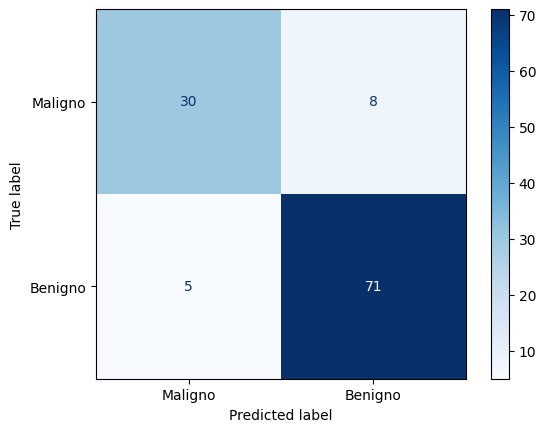

In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generar matriz de confusión
cm = confusion_matrix(y_prueba, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Maligno', 'Benigno'])
disp.plot(cmap='Blues')
#plt.savefig('matriz_confusion.png')
plt.show()
plt.close()

**Observación**: La matriz muestra aciertos y errores por clase.

### Ejemplo 13: Curva ROC
Evaluar con una curva ROC (Receiver Operating Characteristic Curve).

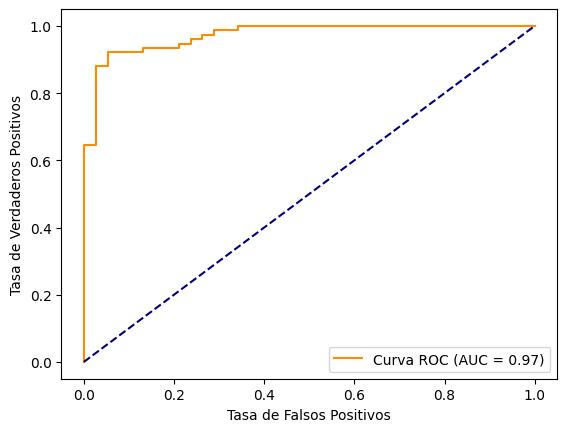

In [122]:
from sklearn.metrics import roc_curve, auc
# Calcular probabilidades
y_prob = modelo.predict_proba(X_prueba)[:, 1]
fpr, tpr, _ = roc_curve(y_prueba, y_prob)
roc_auc = auc(fpr, tpr)
# Visualizar
plt.plot(fpr, tpr, color='darkorange', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
#plt.savefig('curva_roc.png')
plt.show()
plt.close()

**Observación**: Un AUC alto indica buen poder discriminatorio.

### Ejemplo 14: División con Conjunto de Validación
Incluir un conjunto de validación.

In [30]:
# Dividir en entrenamiento (60%), validación (20%), prueba (20%)
X_temp, X_prueba, y_temp, y_prueba = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_entrenamiento, X_validacion, y_entrenamiento, y_validacion = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)
# Entrenar y evaluar
modelo.fit(X_entrenamiento, y_entrenamiento)
print(f"Precisión en validación: {modelo.score(X_validacion, y_validacion):.3f}")
print(f"Precisión en prueba: {modelo.score(X_prueba, y_prueba):.3f}")

Precisión en validación: 0.939
Precisión en prueba: 0.956


**Observación**: El conjunto de validación optimiza hiperparámetros.

### Ejemplo 15: Manejo de Datos Desbalanceados
Simular datos desbalanceados y aplicar sobremuestreo.

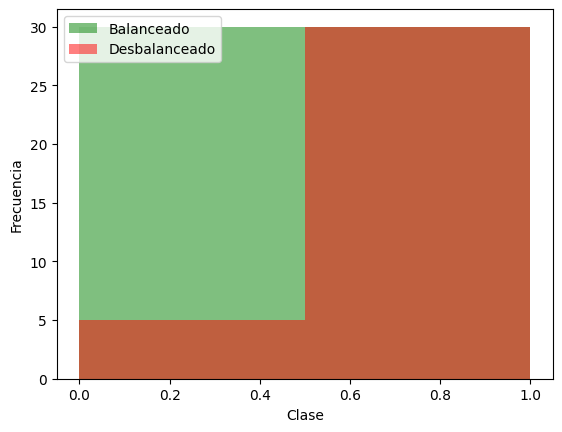

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
# Crear datos desbalanceados
np.random.seed(42)
X_desbalanceado = np.vstack([X[y == 1][:30], X[y == 0][:5]])
y_desbalanceado = np.hstack([np.ones(30), np.zeros(5)])
# Aplicar SMOTE
smote = SMOTE(random_state=42, k_neighbors=4)
X_balanceado, y_balanceado = smote.fit_resample(X_desbalanceado, y_desbalanceado)
# Visualizar
plt.hist(y_balanceado, bins=2, color='green', alpha=0.5, label='Balanceado')
plt.hist(y_desbalanceado, bins=2, color='red', alpha=0.5, label='Desbalanceado')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.legend()
#plt.savefig('balanceo_clases.png')
plt.show()
plt.close()

**Observación**: El balanceo mejora el aprendizaje de clases minoritarias.

## 3. Validación Cruzada: Estimación del Error de Predicción
La validación cruzada (VC) estima el rendimiento mediante múltiples divisiones.
- **Validación cruzada de $k$ pliegues**:
  - Divide los datos en $k$ pliegues.
  - Entrena en $k-1$ pliegues, prueba en el restante.
  - Repite $k$ veces, promedia los resultados.
- **Ventajas**:
  - Usa todos los datos para entrenamiento y prueba.
  - Reduce la varianza.

**Observación**: Asume datos i.i.d.

### Métricas de Clasificación en Machine Learning: Precisión, Sensibilidad y Especificidad
En problemas de clasificación en machine learning, las métricas como precisión, sensibilidad (también conocida como recall o tasa de verdaderos positivos) y especificidad son fundamentales para evaluar el rendimiento de un modelo. Estas métricas se derivan de la matriz de confusión, que clasifica las predicciones en cuatro categorías:

Verdaderos Positivos (TP): Casos positivos correctamente clasificados.
Falsos Positivos (FP): Casos negativos incorrectamente clasificados como positivos.
Verdaderos Negativos (TN): Casos negativos correctamente clasificados.
Falsos Negativos (FN): Casos positivos incorrectamente clasificados como negativos.

A continuación, se presentan las definiciones y fórmulas de estas métricas.
1. Precisión
La precisión mide la proporción de predicciones positivas que son correctas. Es particularmente útil cuando el costo de los falsos positivos es alto, como en la detección de spam, donde clasificar un correo legítimo como spam es indeseable.
Fórmula:$$\text{Precisi\'on} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

Interpretación: Un valor alto indica que la mayoría de las predicciones positivas son correctas.
Ejemplo: Si un modelo predice 100 casos como positivos, y 80 son TP mientras que 20 son FP, la precisión es ( $\frac{80}{80 + 20} = 0.8$ ) (80%).

2. Sensibilidad (Recall)
La sensibilidad mide la proporción de casos positivos reales que el modelo identifica correctamente. Es crucial en escenarios donde los falsos negativos son costosos, como en diagnósticos médicos, donde no detectar una enfermedad puede tener graves consecuencias.
Fórmula:$$\text{Sensibilidad} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

Interpretación: Un valor alto indica que el modelo detecta la mayoría de los casos positivos reales.
Ejemplo: Si hay 100 casos positivos reales, con 90 TP y 10 FN, la sensibilidad es ( $\frac{90}{90 + 10} = 0.9$ ) (90%).

3. Especificidad
La especificidad mide la proporción de casos negativos reales que el modelo identifica correctamente. Es importante en contextos donde los falsos positivos son problemáticos, como en pruebas de detección de fraudes, donde clasificar una transacción legítima como fraudulenta puede ser costoso.
Fórmula:$$\text{Especificidad} = \frac{\text{TN}}{\text{TN} + \text{FP}}$$

Interpretación: Un valor alto indica que el modelo identifica correctamente la mayoría de los casos negativos.
Ejemplo: Si hay 100 casos negativos reales, con 95 TN y 5 FP, la especificidad es ( $\frac{95}{95 + 5} = 0.95$ ) (95%).

Resumen

- **Precisión**: Se enfoca en la calidad de las predicciones positivas $\frac{\text{TP}}{\text{TP} + \text{FP}} $.
- **Sensibilidad**: Se enfoca en la capacidad de detectar todos los casos positivos $\frac{\text{TP}}{\text{TP} + \text{FN}}$.
- **Especificidad**: Se enfoca en la capacidad de detectar todos los casos negativos $\frac{\text{TN}}{\text{TN} + \text{FP}}$.

Estas métricas son complementarias y deben elegirse según las prioridades del problema. Por ejemplo, en un diagnóstico médico, la sensibilidad puede ser más importante, mientras que en un filtro de spam, la precisión puede ser prioritaria.


### Ejemplo 16: VC de 5 Pliegues
Estimar el rendimiento con VC de 5 pliegues (o iteraciones). ¿En qué consiste? En partir la base de datos aleatoriamente en $k$ conjuntos de (aproximadamente) el mismo tamaño. Luego, para cada subconjunto, se entrenará al modelo con los $k-1$ subconjuntos restantes y se pondrá a prueba con el conjunto seleccionado. 

In [125]:
from sklearn.model_selection import cross_val_score
# Inicializar modelo
modelo = LogisticRegression(max_iter=10000, random_state=42)
# Realizar VC de 5 pliegues
puntuaciones = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
print("Puntuaciones de precisión en VC de 5 pliegues:", puntuaciones)
print(f"Precisión media: {puntuaciones.mean():.3f} ± {(puntuaciones.std()/np.sqrt(5)):.3f}")

Puntuaciones de precisión en VC de 5 pliegues: [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Precisión media: 0.951 ± 0.018


**Observación**: La desviación estándar indica estabilidad.

### Ejemplo 17: VC Estratificada
Usar VC estratificada. Esta versión se asegura de que, en la partición de $k$ subconjuntos, haya un balance en la proporción de cada clase.

In [126]:
from sklearn.model_selection import StratifiedKFold
# Inicializar VC estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
puntuaciones = cross_val_score(modelo, X, y, cv=skf, scoring='accuracy')
print("Puntuaciones de precisión en VC estratificada de 5 pliegues:", puntuaciones)
print(f"Precisión media: {puntuaciones.mean():.3f} ± {(puntuaciones.std()/np.sqrt(5)):.3f}")

Puntuaciones de precisión en VC estratificada de 5 pliegues: [0.96491228 0.92105263 0.96491228 0.94736842 0.97345133]
Precisión media: 0.954 ± 0.019


**Observación**: La estratificación es clave para datos desbalanceados.

### Ejemplo 18: VC de Leave-One-Out
Usar Leave-One-Out (LOO). Esto corresponde a $k=n$ pliegues dónde $n$ indica el número de datos. Es costoso pero también es el más robusto.

In [127]:
from sklearn.model_selection import LeaveOneOut
# Subconjunto pequeño
X_pequeno, y_pequeno = X[:50], y[:50]
loo = LeaveOneOut()
puntuaciones = cross_val_score(modelo, X_pequeno, y_pequeno, cv=loo, scoring='accuracy')
print("Precisión media en VC LOO:", puntuaciones.mean())

Precisión media en VC LOO: 0.94


**Observación**: LOO es preciso pero costoso.

### Ejemplo 19: VC con Múltiples Métricas
Evaluar precisión, sensibilidad y especificidad.

In [128]:
# Evaluar múltiples métricas
metricas = ['accuracy', 'precision', 'recall']
for metrica in metricas:    
    puntuaciones = cross_val_score(modelo, X, y, cv=5, scoring=metrica)    
    print(f"Puntuaciones de {metrica}:", puntuaciones)    
    print(f"{metrica.capitalize()} media: {puntuaciones.mean():.3f} ± {(puntuaciones.std()/np.sqrt(5)):.3f}\n")

Puntuaciones de accuracy: [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Accuracy media: 0.951 ± 0.018

Puntuaciones de precision: [0.91025641 0.94520548 0.98611111 0.94444444 0.98529412]
Precision media: 0.954 ± 0.029

Puntuaciones de recall: [1.         0.97183099 0.98611111 0.94444444 0.94366197]
Recall media: 0.969 ± 0.022



**Observación**: Diferentes métricas resaltan distintos aspectos.

### Ejemplo 20: Impacto del Número de Pliegues
Comparar VC con diferentes $k$.

In [133]:
pliegues = [3, 5, 10, 100]
for k in pliegues:
    puntuaciones = cross_val_score(modelo, X, y, cv=k, scoring='accuracy')
    print(f"VC con {k} pliegues: Precisión media = {puntuaciones.mean():.3f} ± {(puntuaciones.std() / np.sqrt(k)):.3f}")

VC con 3 pliegues: Precisión media = 0.951 ± 0.005
VC con 5 pliegues: Precisión media = 0.951 ± 0.008
VC con 10 pliegues: Precisión media = 0.954 ± 0.008
VC con 100 pliegues: Precisión media = 0.954 ± 0.009


**Observación**: Más pliegues reducen varianza pero aumentan costo.

## 4. Selección de Modelos
Elegir el mejor modelo o hiperparámetros con VC.

**Pasos**:
- Definir modelos o rejillas de hiperparámetros.
- Evaluar con VC.
- Seleccionar el mejor.

**Observación**: Sobreoptimizar en VC puede causar sobreajuste.

### Ejemplo 21: Comparación de Modelos
Comparar Regresión Logística, Bosque Aleatorio y SVM (support vector machine).

In [17]:
from sklearn.svm import SVC
# Definir modelos
modelos = {    
    'Regresión Logística': LogisticRegression(max_iter=10000, random_state=42),    
    'Bosque Aleatorio': RandomForestClassifier(random_state=42),    
    'SVM': SVC(random_state=42)}
# Comparar
for nombre, modelo in modelos.items():    
    puntuaciones = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')    
    print(f"{nombre}: Precisión media = {puntuaciones.mean():.3f} ± {puntuaciones.std():.3f}")

NameError: name 'RandomForestClassifier' is not defined

**Observación**: Cada modelo tiene fortalezas específicas.

### Ejemplo 22: Ajuste Manual de Hiperparámetros
Ajustar el número de árboles.

In [39]:
n_estimadores = [10, 50, 100, 200]
for n in n_estimadores:    
    rf = RandomForestClassifier(n_estimators=n, random_state=42)    
    puntuaciones = cross_val_score(rf, X, y, cv=5, scoring='accuracy')    
    print(f"Bosque Aleatorio (n_estimators={n}): Precisión media = {puntuaciones.mean():.3f}")

Bosque Aleatorio (n_estimators=10): Precisión media = 0.949
Bosque Aleatorio (n_estimators=50): Precisión media = 0.954
Bosque Aleatorio (n_estimators=100): Precisión media = 0.956
Bosque Aleatorio (n_estimators=200): Precisión media = 0.958


**Observación**: Más árboles no siempre mejoran el rendimiento.

### Ejemplo 23: Búsqueda en Rejilla
Automatizar el ajuste de hiperparámetros.

In [41]:
from sklearn.model_selection import GridSearchCV
# Rejilla de parámetros
rejilla_parametros = {    
    'n_estimators': [50, 100, 200],    
    'max_depth': [None, 10, 20]}
# Inicializar modelo
rf = RandomForestClassifier(random_state=42)
# Búsqueda en rejilla
busqueda_rejilla = GridSearchCV(rf, rejilla_parametros, cv=5, scoring='accuracy')
busqueda_rejilla.fit(X, y)
print("Mejor combinación de parámetros:", busqueda_rejilla.best_params_)
print(f"Mejor precisión en VC: {busqueda_rejilla.best_score_:.3f}")

Mejor combinación de parámetros: {'max_depth': None, 'n_estimators': 200}
Mejor precisión en VC: 0.958


**Observación**: La búsqueda en rejilla es exhaustiva pero costosa.

### Ejemplo 24: VC Anidada
Usar VC anidada para evitar sobreajuste.

In [16]:
from sklearn.model_selection import KFold
# VC externa
vc_externa = KFold(n_splits=5, shuffle=True, random_state=42)
puntuaciones_externas = []
for idx_entrenamiento, idx_prueba in vc_externa.split(X):    
    X_entrenamiento, X_prueba = X[idx_entrenamiento], X[idx_prueba]    
    y_entrenamiento, y_prueba = y[idx_entrenamiento], y[idx_prueba]        
    # VC interna    
    busqueda_rejilla = GridSearchCV(rf, rejilla_parametros, cv=5, scoring='accuracy')    
    busqueda_rejilla.fit(X_entrenamiento, y_entrenamiento)        
    # Evaluar    
    puntuacion = busqueda_rejilla.score(X_prueba, y_prueba)    
    puntuaciones_externas.append(puntuacion)
    print("Precisión en VC anidada:", np.mean(puntuaciones_externas))

NameError: name 'GridSearchCV' is not defined

**Observación**: La VC anidada es robusta pero intensiva.

### Ejemplo 25: Evaluación Final
Entrenar el modelo seleccionado y evaluar.

In [15]:
# Usar mejor modelo
mejor_modelo = RandomForestClassifier(**busqueda_rejilla.best_params_, random_state=42)
mejor_modelo.fit(X_entrenamiento, y_entrenamiento)
# Evaluar en conjunto de prueba
y_pred_final = mejor_modelo.predict(X_prueba)
print(f"Precisión final en el conjunto de prueba: {accuracy_score(y_prueba, y_pred_final):.3f}")

**Observación**: El modelo final refleja el rendimiento real.

## 5. Visualización de Resultados
Visualizar métricas para comparar modelos.

### Ejemplo 26: Comparación Visual de ModelosGraficar precisión de modelos.

In [ ]:
# Recolectar puntuaciones
nombres = list(modelos.keys())
puntuaciones = [cross_val_score(modelo, X, y, cv=5, scoring='accuracy').mean() for modelo in modelos.values()]
# Visualizar
plt.bar(nombres, puntuaciones, color='skyblue')
plt.xlabel('Modelos')
plt.ylabel('Precisión Media en VC')
plt.xticks(rotation=45)
plt.savefig('comparacion_modelos.png')
plt.close()

**Observación**: La visualización facilita la comparación.

## 6. Conclusión
Hemos cubierto:
- **Aprendizaje Supervisado**: Regresión, clasificación, funciones de pérdida, descenso de gradiente y regularización.
- **División de Datos**: Entrenamiento, validación, prueba y manejo de desbalanceo.
- **Validación Cruzada**: $k$-pliegues, estratificada, LOO.
- **Selección de Modelos**: Comparación, ajuste de hiperparámetros, VC anidada.

**Observación Final**: Un buen modelo equilibra sesgo, varianza y generalización.

## 7. Ejercicio Práctico Carga un conjunto de datos real, aplica los conceptos aprendidos y compara modelos.

In [ ]:
from sklearn.datasets import load_wine
# Cargar datos
datos = load_wine()
X, y = datos.data, datos.target
# Dividir datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, stratify=y, random_state=421)
# Comparar modelos
modelos = {    
    'Regresión Logística': LogisticRegression(max_iter=1000, random_state=42),    
    'Bosque Aleatorio': RandomForestClassifier(random_state=42)}
for nombre, modelo in modelos.items():    
    modelo.fit(X_entrenamiento, y_entrenamiento)    
    y_pred = modelo.predict(X_prueba)    
    print(f"{nombre} - Precisión en prueba: {accuracy_score(y_prueba, y_pred):.3f}")

**Tarea**: Ajusta hiperparámetros y usa VC para mejorar el rendimiento.

In [ ]:
# Evaluar múltiples métricas
metricas = ['accuracy', 'precision', 'recall']
for metrica in metricas:
    puntuaciones = cross_val_score(modelo, X, y, cv=5, scoring=metrica)
    print(f"Puntuaciones de {metrica}:", puntuaciones)
    print(f"{metrica.capitalize()} media: {puntuaciones.mean():.3f} ± {puntuaciones.std():.3f}
")

**Sutileza**: Diferentes métricas resaltan distintos aspectos.

### Ejemplo 20: Impacto del Número de Pliegues

Comparar VC con diferentes $$k$$.

In [ ]:
pliegues = [3, 5, 10]
for k in pliegues:
    puntuaciones = cross_val_score(modelo, X, y, cv=k, scoring='accuracy')
    print(f"VC con {k} pliegues: Precisión media = {puntuaciones.mean():.3f} ± {puntuaciones.std():.3f}")

**Observación**: Más pliegues reducen varianza pero aumentan costo.

## 2. Validación Cruzada

La **validación cruzada** es una técnica para evaluar el rendimiento de un modelo dividiendo los datos en $k$ subconjuntos (folds). El modelo se entrena en $k-1$ subconjuntos y se evalúa en el subconjunto restante, repitiendo el proceso $k$ veces.

### Fórmula de Validación Cruzada

El error promedio de validación cruzada se calcula como:

$$E_{CV} = \frac{1}{k} \sum_{i=1}^k E_i$$

Donde $E_i$ es el error en el fold $i$ y $k$ es el número de folds.

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

## 3. Bosques Aleatorios (Random Forests)

Los bosques aleatorios son un método de ensemble que combina múltiples árboles de decisión. Cada árbol se entrena en un subconjunto aleatorio de los datos y características, reduciendo la varianza y mejorando la generalización.

### Fórmula del Error de un Bosque Aleatorio

El error de un bosque aleatorio depende del error promedio de los árboles individuales y su correlación. El error de generalización se puede expresar como:

$$GE = \bar{\rho} \cdot \bar{s}^2$$

Donde $\bar{\rho}$ es la correlación promedio entre los árboles y $\bar{s}^2$ es la varianza promedio de los árboles.

In [ ]:
# Cargar un conjunto de datos de ejemplo
data = load_iris()
X = data.data
y = data.target

## 4. Configuración del Modelo de Bosque Aleatorio

Crearemos un modelo básico de bosque aleatorio para clasificar las flores del conjunto de datos Iris.

In [ ]:
# Crear un modelo de bosque aleatorio
rf = RandomForestClassifier(random_state=42)

## 5. Validación Cruzada con Bosque Aleatorio

Evaluaremos el modelo usando validación cruzada de 5 folds.

In [ ]:
# Realizar validación cruzada
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print('Precisión promedio:', np.mean(scores))
print('Desviación estándar:', np.std(scores))

## 6. Búsqueda en Rejilla (Grid Search)

La **búsqueda en rejilla** prueba exhaustivamente combinaciones de hiperparámetros para encontrar la mejor configuración.

### Proceso de Búsqueda en Rejilla

1. Definir un espacio de hiperparámetros.
2. Evaluar todas las combinaciones posibles usando validación cruzada.
3. Seleccionar la combinación con el mejor rendimiento.

### Fórmula de Optimización

La búsqueda en rejilla busca minimizar el error de validación cruzada:

$$\hat{\theta} = \arg \min_{\theta \in \Theta} E_{CV}(\theta)$$

Donde $\Theta$ es el espacio de hiperparámetros y $E_{CV}(\theta)$ es el error de validación cruzada para los hiperparámetros $\theta$.

In [ ]:
# Definir el espacio de hiperparámetros para la búsqueda en rejilla
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
# Configurar la búsqueda en rejilla
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Ejecutar la búsqueda en rejilla
grid_search.fit(X, y)

In [ ]:
# Mostrar los mejores hiperparámetros
print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor precisión:', grid_search.best_score_)

## 7. Interpretación de Resultados

Los mejores hiperparámetros son aquellos que minimizan el error de validación cruzada. La precisión reportada es el promedio de los $k$ folds.

In [ ]:
# Obtener el mejor modelo
best_rf = grid_search.best_estimator_

## 8. Evaluación Final

Evaluaremos el modelo final en el conjunto de datos completo.

In [ ]:
# Predecir con el mejor modelo
y_pred = best_rf.predict(X)
print('Precisión en el conjunto completo:', accuracy_score(y, y_pred))

## 9. Importancia de las Características

Los bosques aleatorios permiten evaluar la importancia de cada característica.

In [ ]:
# Mostrar la importancia de las características
feature_importance = pd.DataFrame({
    'Característica': data.feature_names,
    'Importancia': best_rf.feature_importances_
})
print(feature_importance.sort_values(by='Importancia', ascending=False))

## 10. Visualización de Resultados

Visualizaremos los resultados de la búsqueda en rejilla.

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión para diferentes hiperparámetros
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
for n_estimators in param_grid['n_estimators']:
    subset = results[results['param_n_estimators'] == n_estimators]
    plt.plot(subset['param_max_depth'], subset['mean_test_score'], label=f'n_estimators={n_estimators}')
plt.xlabel('Profundidad Máxima')
plt.ylabel('Precisión Promedio')
plt.legend()
plt.title('Precisión vs. Profundidad Máxima')
plt.savefig('grid_search_results.png')

## 11. Comparación con Otros Modelos

Podemos comparar el bosque aleatorio con otros algoritmos, como SVM.

In [ ]:
from sklearn.svm import SVC

# Crear y evaluar un modelo SVM
svm = SVC(random_state=42)
svm_scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print('Precisión promedio SVM:', np.mean(svm_scores))

## 12. Limitaciones de la Búsqueda en Rejilla

La búsqueda en rejilla puede ser computacionalmente costosa, especialmente con un gran espacio de hiperparámetros.

## 13. Alternativas: Búsqueda Aleatoria

La **búsqueda aleatoria** selecciona combinaciones de hiperparámetros al azar, siendo más eficiente para espacios grandes.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Configurar búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X, y)

In [ ]:
# Mostrar los mejores hiperparámetros de la búsqueda aleatoria
print('Mejores hiperparámetros (búsqueda aleatoria):', random_search.best_params_)
print('Mejor precisión (búsqueda aleatoria):', random_search.best_score_)

## 14. Conclusión

Hemos explorado cómo usar validación cruzada, búsqueda en rejilla y bosques aleatorios para seleccionar modelos. La búsqueda en rejilla es exhaustiva pero costosa, mientras que la búsqueda aleatoria es más eficiente para espacios grandes.

## 15. Ejercicio Práctico

Intenta ajustar un modelo de bosque aleatorio con un conjunto de datos diferente, como el conjunto de datos de dígitos de sklearn (`load_digits`).

In [ ]:
from sklearn.datasets import load_digits

# Cargar el conjunto de datos de dígitos
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

In [ ]:
# Crear y evaluar un modelo para los dígitos
rf_digits = RandomForestClassifier(random_state=42)
scores_digits = cross_val_score(rf_digits, X_digits, y_digits, cv=5, scoring='accuracy')
print('Precisión promedio (dígitos):', np.mean(scores_digits))

## 16. Resumen

- **Validación cruzada**: Evalúa el rendimiento del modelo de manera robusta.
- **Búsqueda en rejilla**: Encuentra los mejores hiperparámetros de forma exhaustiva.
- **Bosques aleatorios**: Modelos robustos que combinan múltiples árboles de decisión.
- **Búsqueda aleatoria**: Alternativa eficiente para espacios de hiperparámetros grandes.

## 4. Selección de Modelos

Elegir el mejor modelo o hiperparámetros con VC.

- **Pasos**:
  - Definir modelos o rejillas de hiperparámetros.
  - Evaluar con VC.
  - Seleccionar el mejor.

**Sutileza**: Sobreoptimizar en VC puede causar sobreajuste.

### Ejemplo 21: Comparación de Modelos

Comparar Regresión Logística, Bosque Aleatorio y SVM.

In [ ]:
from sklearn.svm import SVC

# Definir modelos
modelos = {
    'Regresión Logística': LogisticRegression(max_iter=1000, random_state=42),
    'Bosque Aleatorio': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Comparar
for nombre, modelo in modelos.items():
    puntuaciones = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
    print(f"{nombre}: Precisión media = {puntuaciones.mean():.3f} ± {puntuaciones.std():.3f}")

**Observación**: Cada modelo tiene fortalezas específicas.

### Ejemplo 22: Ajuste Manual de Hiperparámetros

Ajustar el número de árboles.

In [ ]:
n_estimadores = [10, 50, 100, 200]
for n in n_estimadores:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    puntuaciones = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
    print(f"Bosque Aleatorio (n_estimators={n}): Precisión media = {puntuaciones.mean():.3f}")

**Sutileza**: Más árboles no siempre mejoran el rendimiento.

### Ejemplo 23: Búsqueda en Rejilla

Automatizar el ajuste de hiperparámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Rejilla de parámetros
rejilla_parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

# Inicializar modelo
rf = RandomForestClassifier(random_state=42)

# Búsqueda en rejilla
busqueda_rejilla = GridSearchCV(rf, rejilla_parametros, cv=5, scoring='accuracy')
busqueda_rejilla.fit(X, y)

print("Mejor combinación de parámetros:", busqueda_rejilla.best_params_)
print(f"Mejor precisión en VC: {busqueda_rejilla.best_score_:.3f}")

**Observación**: La búsqueda en rejilla es exhaustiva pero costosa.

### Ejemplo 24: VC Anidada

Usar VC anidada para evitar sobreajuste.

In [ ]:
from sklearn.model_selection import KFold

# VC externa
vc_externa = KFold(n_splits=5, shuffle=True, random_state=42)
puntuaciones_externas = []

for idx_entrenamiento, idx_prueba in vc_externa.split(X):
    X_entrenamiento, X_prueba = X[idx_entrenamiento], X[idx_prueba]
    y_entrenamiento, y_prueba = y[idx_entrenamiento], y[idx_prueba]
    
    # VC interna
    busqueda_rejilla = GridSearchCV(rf, rejilla_parametros, cv=5, scoring='accuracy')
    busqueda_rejilla.fit(X_entrenamiento, y_entrenamiento)
    
    # Evaluar
    puntuacion = busqueda_rejilla.score(X_prueba, y_prueba)
    puntuaciones_externas.append(puntuacion)

print("Precisión en VC anidada:", np.mean(puntuaciones_externas))

**Sutileza**: La VC anidada es robusta pero intensiva.

### Ejemplo 25: Evaluación Final

Entrenar el modelo seleccionado y evaluar.

In [ ]:
# Usar mejor modelo
mejor_modelo = RandomForestClassifier(**busqueda_rejilla.best_params_, random_state=42)
mejor_modelo.fit(X_entrenamiento, y_entrenamiento)

# Evaluar
precision_final = mejor_modelo.score(X_prueba, y_prueba)
print(f"Precisión final en conjunto de prueba: {precision_final:.3f}")

**Observación**: La evaluación final confirma el rendimiento.

## Resumen

- **Aprendizaje Supervisado**: Minimiza $$L(y, f(X; \theta))$$ para mapear $$X$$ a $$y$$.
- **División de Datos**: Evita sobreajuste con estratificación.
- **Validación Cruzada**: Estima error robustamente.
- **Selección de Modelos**: Equilibra rendimiento y complejidad.

Estos conceptos son fundamentales para modelos efectivos.